# Advanced Analytics with SciPy and sci-kit learn


## Learning Objectives

- 4.1 Understand SciPy
- 4.2 Compute means, medians, quartiles, and other statistics
- 4.3 Fit data and interpolate
- 4.4 Understand SciKit Learn

We're going to study 2012 temperature data in New York City.  

SciPy refers to several related but distinct entities:

The Scipy Stack, a collection of open source software for scientific computing in Python, and particularly a specified set of core packages.
The community of people who use and develop this stack.
Several conferences dedicated to scientific computing in Python - Scipy, EuroScipy and Scipy.in.
The SciPy library, one component of the Scipy stack, providing many numerical routines.

The Scipy Stack

Python, a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping, while being powerful enough to write large applications in.

NumPy, the fundamental package for numerical computation. It defines the numerical array and matrix types and basic operations on them.

The SciPy library, a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

Matplotlib, a mature and popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting

pandas, providing high-performance, easy to use data structures.

SymPy, for symbolic mathematics and computer algebra.

IPython, a rich interactive interface, letting you quickly process data and test ideas. The IPython notebook works in your web browser, allowing you to document your computation in an easily reproducible form.

nose, a framework for testing Python code.


### Import Modules

In [1]:
import numpy as np
import zipfile
import os
import urllib2

In [76]:
url = 'http://files.figshare.com/1116528/weather.zip'

print 'Downloading Stations CSV'

response = urllib2.urlopen(url)

fname = 'weather.zip'
with open(fname,'wb') as f:
    f.write(response.read())

zfile = zipfile.ZipFile("weather.zip")
dirname = zfile.namelist()[0]

#check if directory exists
if not os.path.exists(dirname):
    os.mkdir(dirname)
    
for name in zfile.namelist()[1:]:
    print name
    with open(name,"w") as f:
        f.write(zfile.read(name))

weather/CALOSANG.txt
weather/CASANFRA.txt
weather/INSOBEND.txt
weather/KYLEXING.txt
weather/MDWASHDC.txt
weather/NYNEWYOR.txt
weather/WASEATTL.txt


In [2]:
dt = np.dtype([('Month', 'int8'), ('Day', 'int8'), ('Year', 'int16'), ('Temp', 'float64')])
data = np.loadtxt('weather/NYNEWYOR.txt',dtype=dt)
data[:5]
total_days = len(data)

In [3]:
year2012 = data[data['Year']==2012]

SciPy contains several modules/toolboxes dedicated to common issues in scientific computing.  While a given domain will need tools from several different modules,
the modules have been separated for different computing applications.  At a high level there are modules for

- Linear Algebra
- Fitting and Optimizing functions
- Statistics
- Integration
- Interpolation

And a few other modules for signal and image processing and other more specialized computing.

###Section 5.1 Stats

In [4]:
from scipy import stats
import scipy as sp

Descriptive statistics are baked in.

skew, kurtosis are the 3rd and 4th order moments of the distribution.

In [5]:
def describe_data(x):
    n, min_max, mean, var, skew, kurt = sp.stats.describe(x)
    print 'number of points: ', n
    print 'min/max: ', min_max
    print 'mean: ', mean
    print 'variance: ', var
    print 'skew: ', skew
    print 'kurtosis: ', kurt
    print 'median: ', sp.median(x)
    
describe_data(year2012['Temp'])

number of points:  366
min/max:  (19.100000000000001, 89.200000000000003)
mean:  58.068579235
variance:  247.366873044
skew:  0.00160652566232
kurtosis:  -1.01332994349
median:  58.25


Quartile calculation, demarcators of boundaries of median, etc.. of data

In [6]:
sp.stats.mstats.mquantiles(year2012['Temp'],[0.5, 0.75, 1.0])

array([ 58.25 ,  71.805,  89.2  ])

SciPy's stats package has many convenience functions for handling continuous and discrete random variables.  This is an advanced topic that we'll briefly dive into here.

### Fitting a distribution with known parameters

In [7]:
%pylab inline
import matplotlib.pyplot as plt


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.kernel.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


(25.068608210737064, 0.88072985039898022)


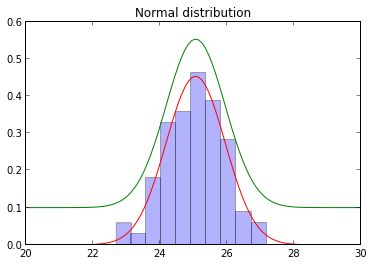

In [9]:
import numpy as np
np.random.seed(1)
# create random variables
rnd = sp.stats.norm.rvs(loc=25,scale=1,size=150) 

param = sp.stats.norm.fit(rnd) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
print param
x = np.linspace(20,30,100)
# fitted distribution
pdf_fitted = sp.stats.norm.pdf(x,loc=param[0],scale=param[1])

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-')
plt.plot(x,pdf_fitted+0.1,'g-')
plt.hist(rnd,normed=1,alpha=.3);

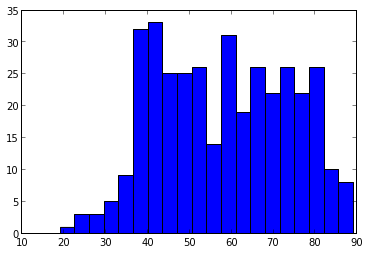

In [10]:
plt.hist(year2012['Temp'],bins=20);

A common way to estimate an unknown probability density function from a collection of samples of random variables (here, the Temperature), is the Gaussian KDE, where KDE stands for kernel density estimation.

You deliver your data to the function, and SciPy stats runs the advanced statistical tool for you.

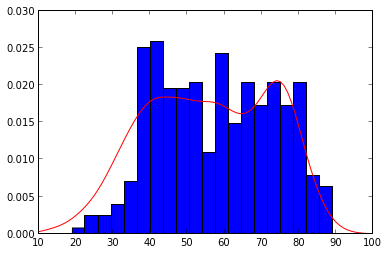

In [11]:
pdf = sp.stats.gaussian_kde(data['Temp'])
x = np.arange(10,100)
plt.hist(year2012['Temp'],bins=20,normed=True)
plt.plot(x,pdf(x),'r-');

Let's add more data.  

In [94]:
import glob
files = glob.glob('weather/*.txt')
names = [os.path.splitext(os.path.basename(file))[0] for file in files]
print files

['weather/CALOSANG.txt', 'weather/CASANFRA.txt', 'weather/INSOBEND.txt', 'weather/KYLEXING.txt', 'weather/MDWASHDC.txt', 'weather/NYNEWYOR.txt', 'weather/WASEATTL.txt']


We have a large collection of data that we'd like to analyze as a single array spread out across multiple files.  In this case, the chunks of data in each are compatible.  We'll use a vstack here of a concatenate, but in general you may need to use concatenate for merging irregularly-sized arrays.

globbing = pattern matching based on wildcard characters, the most common of which is the *.

In [96]:
dt = np.dtype([('Month', 'int8'), ('Day', 'int8'), ('Year', 'int16'), ('Temp', 'float64')])
total_temps = []
files = glob.glob('weather/*.txt')
for f in files:
    t_data = np.loadtxt(f,dtype=dt)
    total_temps.append(t_data['Temp'])

In [98]:
total_temps = np.vstack(total_temps).flatten()
print total_temps.shape

(47243,)


47243/7/365 18.5 years of 7 stations collecting data daily

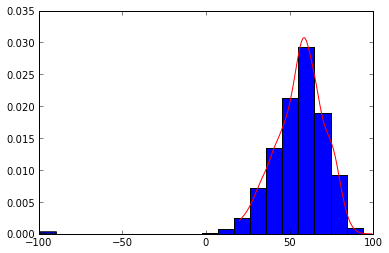

In [101]:
pdf = sp.stats.gaussian_kde(total_temps)
x = np.arange(20,100)
plt.hist(total_temps,bins=20,normed=True)
plt.plot(x,pdf(x),'r-');

That looks a bit more Gaussian.  Can we fit it?

(55.379681645957902, 16.856163815848234)


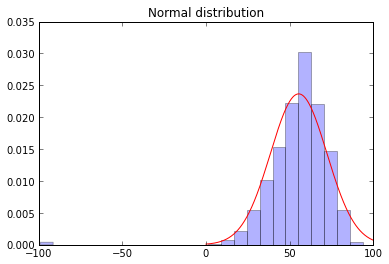

In [25]:
param = sp.stats.norm.fit(total_temps) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
print param
x = np.linspace(0,100,1000)
# fitted distribution
pdf_fitted = sp.stats.norm.pdf(x,loc=param[0],scale=param[1])

title('Normal distribution')
plt.plot(x,pdf_fitted,'r-')
plt.hist(total_temps,bins=25,normed=1,alpha=.3);

In [105]:
describe_data(total_temps)
describe_data(total_temps[total_temps != -99])

number of points:  47243
min/max:  (-99.0, 93.700000000000003)
mean:  55.379681646
variance:  284.136272944
skew:  -2.54620571787
kurtosis:  19.9386012172
median:  57.2
number of points:  47100
min/max:  (-11.199999999999999, 93.700000000000003)
mean:  55.8483927813
variance:  212.418248547
skew:  -0.439186571362
kurtosis:  -0.00406997817694
median:  57.3


(55.848392781316178, 14.574420695376137)


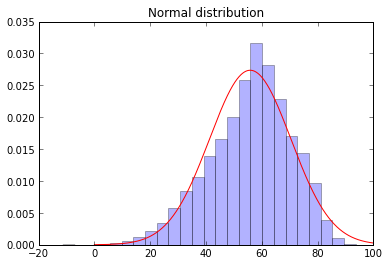

In [106]:
total_temps = total_temps[total_temps != -99]

param = sp.stats.norm.fit(total_temps) # distribution fitting

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
print param
x = np.linspace(0,100,1000)
# fitted distribution
pdf_fitted = sp.stats.norm.pdf(x,loc=param[0],scale=param[1])

title('Normal distribution')
plt.plot(x,pdf_fitted,'r-')
plt.hist(total_temps,bins=25,normed=1,alpha=.3);

##5.3 Fitting and interpolation

In [116]:
dt = np.dtype([('Month', 'int8'), ('Day', 'int8'), ('Year', 'int16'), ('Temp', 'float64')])
data = np.loadtxt('weather/NYNEWYOR.txt',dtype=dt)

v_idxs = np.where(data['Temp'] != -99.0)
print v_idxs

na_idxs = np.where(data['Temp'] == -99.0)
print na_idxs

(array([   0,    1,    2, ..., 6746, 6747, 6748]),)
(array([ 492,  514,  517,  518,  522, 1453, 1454, 1459, 1460, 1470, 2725,
       2726, 2727, 2728, 2806, 2934, 2981, 4622, 5015, 5212]),)


In [121]:
data['Temp'][514:523]

array([-99. ,  57.4,  58.5, -99. , -99. ,  59.7,  63.1,  65.9, -99. ])

How to clean up?  
Drop and interpolate?

np.delete in this case is deleting a row.

In [122]:
for na in na_idxs:
    data = np.delete(data,na,0)

Now we have missing dates we can interpolate the values for the missing dates

In [123]:
data[514:523][['Day','Temp']]

array([(31, 58.5), (3, 59.7), (4, 63.1), (5, 65.9), (7, 69.6), (8, 74.2),
       (9, 68.9), (10, 71.4), (11, 70.8)], 
      dtype=[('Day', 'i1'), ('Temp', '<f8')])

In [129]:
from scipy.interpolate import interp1d
x = v_idxs[0]
linterp = interp1d(x, data['Temp'],kind='linear')

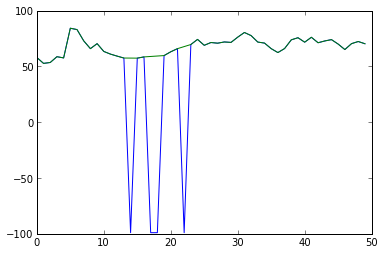

In [134]:
original_data = np.loadtxt('weather/NYNEWYOR.txt',dtype=dt)
plt.plot(original_data['Temp'][500:550])
xnew = np.arange(total_days)
plt.plot(linterp(xnew)[500:550]);

Jagged peaks are the results of the rows we dropped.  Interpolating the data fills in the holes. The argument `kind=` defines how data is filled in: `linear`, `cubic`, `nearest`.  Let's illustrate the above with lots of gaps in the data.

In [131]:
x = np.linspace(0, 10, 10)
y = np.cos(-x**2/8.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

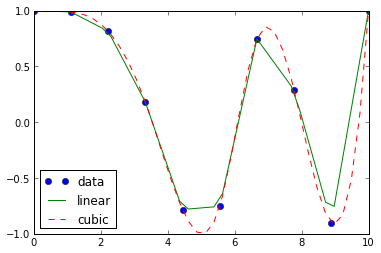

In [132]:
xnew = np.linspace(0, 10, 40)
plt.plot(x,y,'o',xnew,f(xnew),'-', xnew, f2(xnew),'--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Above you can see how interpolation can help define a function over the same range but will succesfully return results for any granularity within that range.

Curve fitting is also important for understanding the behavior of physical, biological, and other data producing systems.  For example, we are pretty sure that the weather is oscillatory follows a fairly well defined period.  

##5.4 SciKit Learn Overview

SciPy covers many of the canonical scientific computing applications, howver, recent developments in statisical computing and data mining have spawned a new field: machine learning.  Scikit-learn is largely considered the standard machine learning package for Python.  Like many numerical computing packages, Scikit-learn leverages NumPy's architeture and memory model under the hood.

At a high level we can separate machine learning into two main categories:

- Supervised Learning
- Unsupervised Learning

*note: there is a gradient between these two extremes and many techniques leverage semi-supervised learning*

Generally, when we speak of supervised learning we are referencing algorithm where the data come pre-labeled.  That is, these sample are good these samples are bad, or these samples are category 1, these are category 2, etc.  Often, supervised learning is useful for predicting the category or class a new sample should have.

Unsupervised learning defines a collection of algorithms where data is not labeled.  Often there are relationships between data and we want to infer/predict those relationships.

Within machine learning there exist four main techniques: regression, dimensionality reduction, classification, and clustering. 

Andreas Mueller's Cheat Sheet for SciKit Learn  
http://peekaboo-vision.blogspot.com/2013/01/machine-learning-cheat-sheet-for-scikit.html

Scikit learn provides same inteface for many algorithms

- build predictor
- apply fit


In [ ]:
%pylab inline
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
digits.target[-1]
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])
clf.predict(digits.data[-1])